## Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Load the data

In [2]:
df=pd.read_csv('../data/olist_customers_dataset.csv')


In [3]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,review_score,review_comment_message
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,4,"Não testei o produto ainda, mas ele veio corre..."
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,4,"Não testei o produto ainda, mas ele veio corre..."
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,4,"Não testei o produto ainda, mas ele veio corre..."
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1,credit_card,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,4,Deveriam embalar melhor o produto. A caixa vei...
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1,credit_card,...,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,5,"Só achei ela pequena pra seis xícaras ,mais é ..."


### 2. Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115609 entries, 0 to 115608
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       115609 non-null  object 
 1   customer_id                    115609 non-null  object 
 2   order_status                   115609 non-null  object 
 3   order_purchase_timestamp       115609 non-null  object 
 4   order_approved_at              115595 non-null  object 
 5   order_delivered_carrier_date   114414 non-null  object 
 6   order_delivered_customer_date  113209 non-null  object 
 7   order_estimated_delivery_date  115609 non-null  object 
 8   payment_sequential             115609 non-null  int64  
 9   payment_type                   115609 non-null  object 
 10  payment_installments           115609 non-null  int64  
 11  payment_value                  115609 non-null  float64
 12  customer_unique_id            

> we have  float64(10), int64(5), object(18) columns in the dataset.

In [5]:
df.describe()

,payment_sequential,payment_installments,payment_value,customer_zip_code_prefix,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_score
count,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115609.000000,115608.000000,115608.000000,115608.000000,115608.000000,115609.000000
mean,1.093747,2.946233,172.387379,35061.537597,1.194535,120.619850,20.056880,48.766541,785.808198,2.205373,2113.907697,30.307903,16.638477,23.113167,4.034409
std,0.729849,2.781087,265.873969,29841.671732,0.685926,182.653476,15.836184,10.034187,652.418619,1.717771,3781.754895,16.211108,13.473570,11.755083,1.385584
min,1.000000,0.000000,0.000000,1003.000000,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1.000000
25%,1.000000,1.000000,60.870000,11310.000000,1.000000,39.900000,13.080000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,4.000000
50%,1.000000,2.000000,108.050000,24241.000000,1.000000,74.900000,16.320000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,5.000000
75%,1.000000,4.000000,189.480000,58745.000000,1.000000,134.900000,21.210000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,5.000000
max,29.000000,24.000000,13664.080000,99980.000000,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,5.000000


In [6]:
#remove unnecessary columns
df= df.drop(
                [
                    "order_approved_at",
                    "order_delivered_carrier_date",
                    "order_delivered_customer_date",
                    "order_estimated_delivery_date",
                    "order_purchase_timestamp",
                ],
                axis=1,
            )


**2.1 Check the missing values**

In [7]:
# which columns has more han 1 missing value
df.isnull().sum()[df.isnull().sum()>=1]


product_weight_g              1
product_length_cm             1
product_height_cm             1
product_width_cm              1
review_comment_message    66703
dtype: int64

### 3. Data Preprocessing

create a pipeline to preprocess the data and train the model.

In [8]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

numerical_imputer = SimpleImputer(strategy='most_frequent')
cateogrical_imputer = SimpleImputer(strategy='constant', fill_value='No reviews')


numerical_features=["product_weight_g","product_length_cm","product_height_cm","product_width_cm"]
categorical_features=["review_comment_message"]

imputer=ColumnTransformer([
    ('numerical_imputer',numerical_imputer,numerical_features),
    ('categorical_imputer',cateogrical_imputer,categorical_features)
])

imputer.fit(df[numerical_features+categorical_features])
#impute the missing values
df[numerical_features+categorical_features]=imputer.transform(df[numerical_features+categorical_features])

### 3.visualize the data

Plot 1: Order Status Distribution

In [9]:
temp_df=pd.read_csv('../data/olist_customers_dataset.csv')

Text(0, 0.5, 'Count')

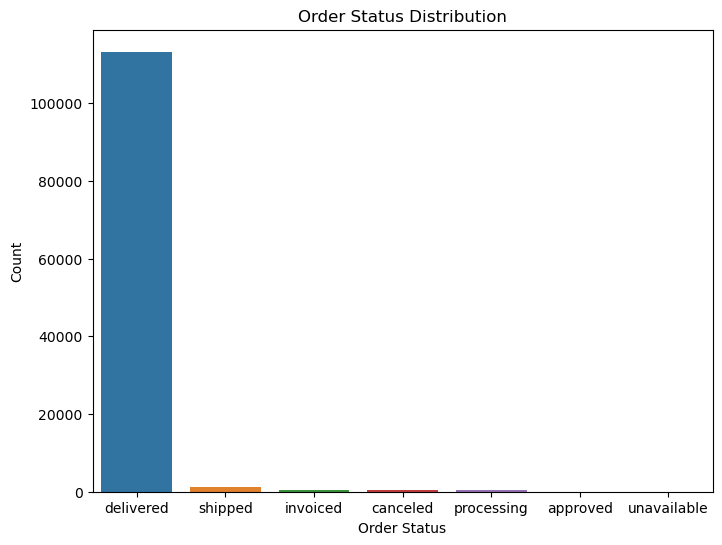

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style

# Plot 1: Order Status Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='order_status', data=df)
plt.title('Order Status Distribution')
plt.xlabel('Order Status')
plt.ylabel('Count')

Text(0.5, 1.0, 'Payment Type Distribution')

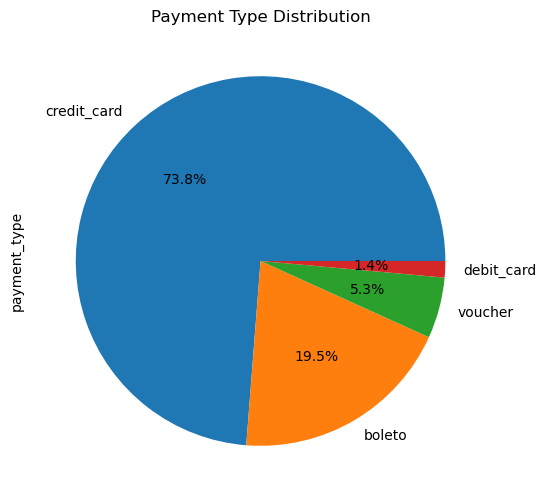

In [11]:
# Plot 2: Payment Type Distribution
plt.figure(figsize=(8, 6))
df['payment_type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Payment Type Distribution')

Text(0, 0.5, 'Number of Orders')

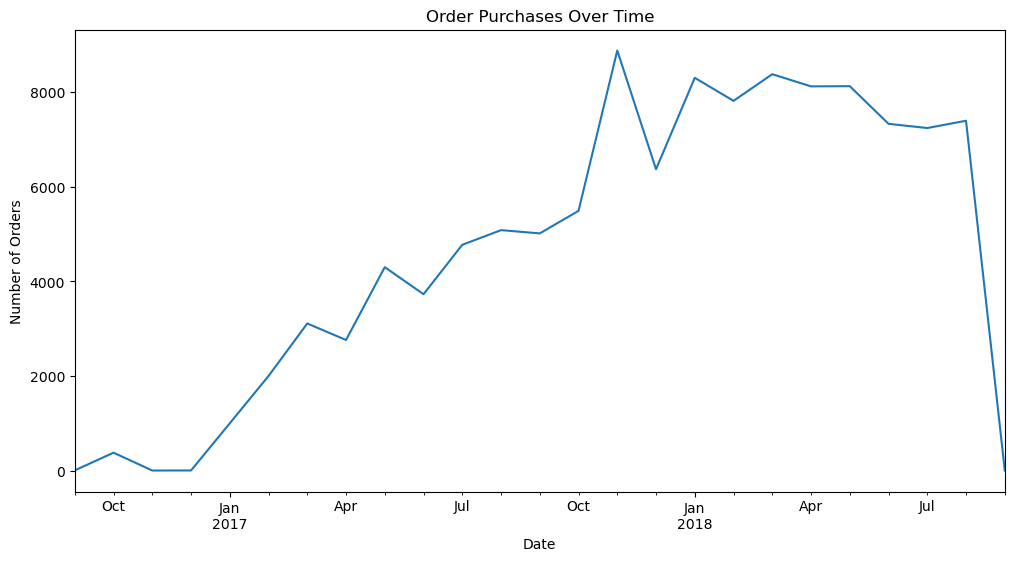

In [12]:
plt.figure(figsize=(12, 6))
temp_df['order_purchase_timestamp'] = pd.to_datetime(temp_df['order_purchase_timestamp'])
temp_df.set_index('order_purchase_timestamp').resample('M').size().plot()
plt.title('Order Purchases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Orders')


Text(0, 0.5, 'Frequency')

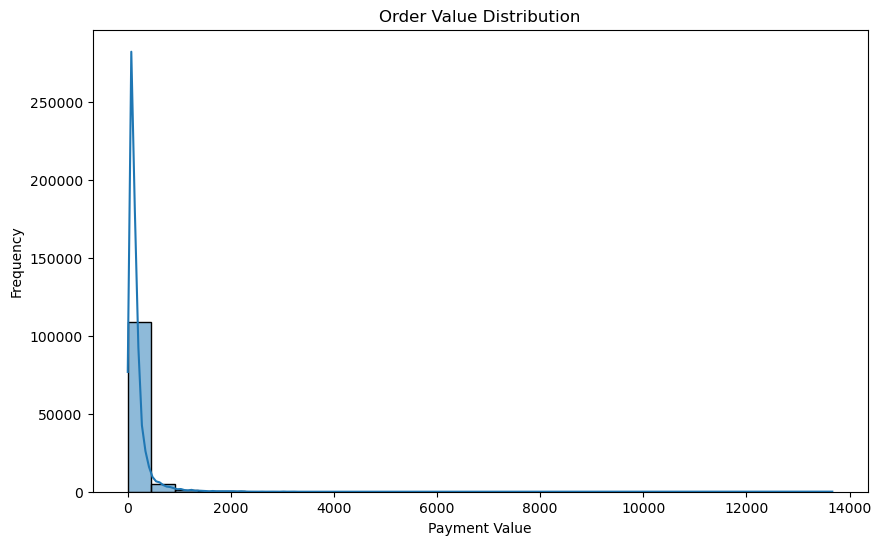

In [13]:
# Plot 4: Order Value Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['payment_value'], bins=30, kde=True)
plt.title('Order Value Distribution')
plt.xlabel('Payment Value')
plt.ylabel('Frequency')


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'bed_bath_table'),
  Text(1, 0, 'health_beauty'),
  Text(2, 0, 'sports_leisure'),
  Text(3, 0, 'furniture_decor'),
  Text(4, 0, 'computers_accessories'),
  Text(5, 0, 'housewares'),
  Text(6, 0, 'watches_gifts'),
  Text(7, 0, 'telephony'),
  Text(8, 0, 'garden_tools'),
  Text(9, 0, 'auto')])

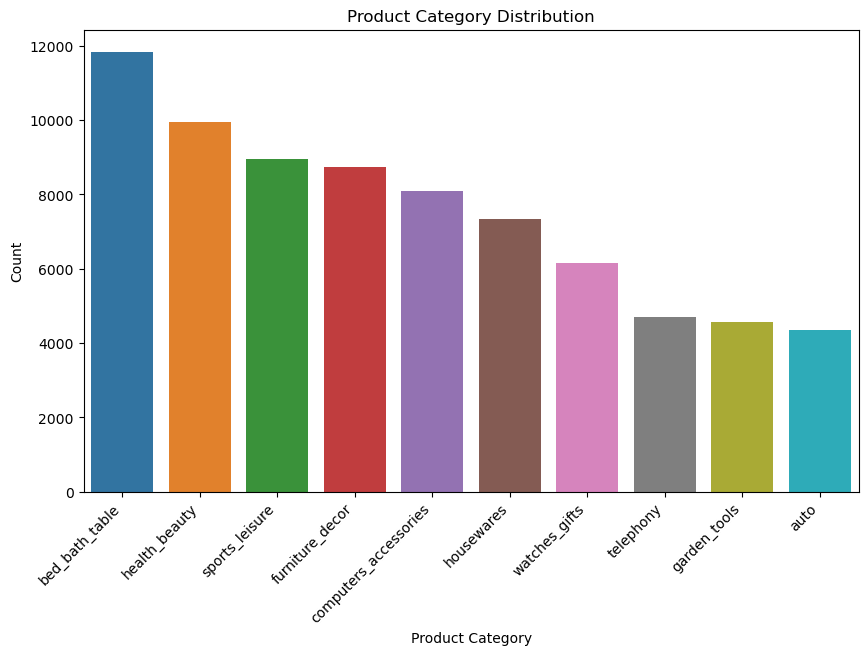

In [14]:
# Plot 5: Product Category Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='product_category_name_english', data=df, order=df['product_category_name_english'].value_counts().index[:10])
plt.title('Product Category Distribution')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

Text(0, 0.5, 'Frequency')

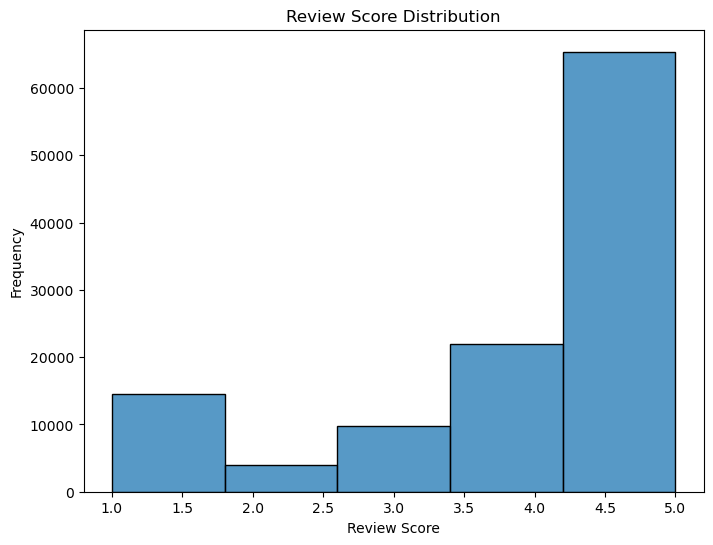

In [15]:
# Plot 6: Review Score Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['review_score'], bins=5, kde=False)
plt.title('Review Score Distribution')
plt.xlabel('Review Score')
plt.ylabel('Frequency')


Text(0.5, 1.0, 'Customer Location Distribution')

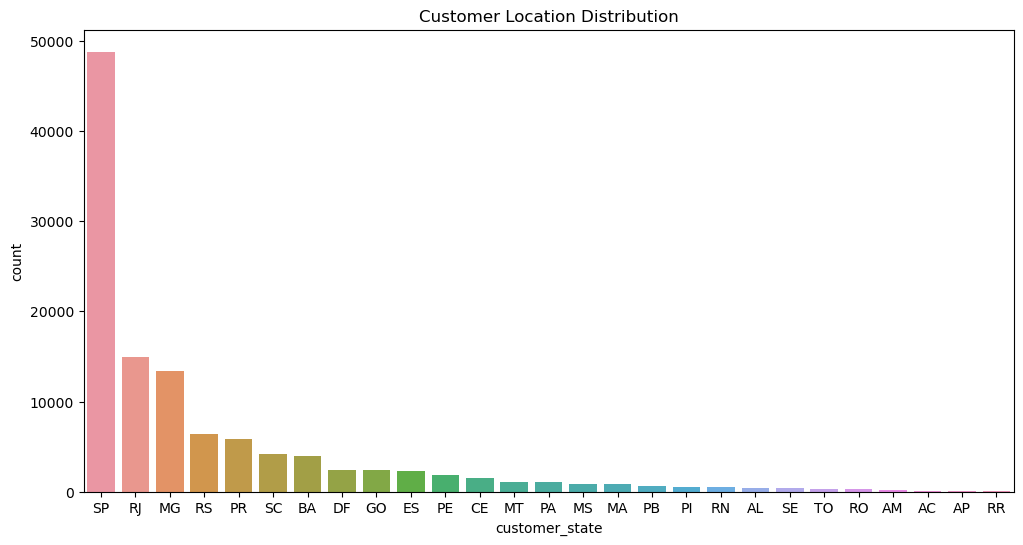

In [16]:
# Plot 7: Customer Location Distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='customer_state', data=df, order=df['customer_state'].value_counts().index)
plt.title('Customer Location Distribution')

/var/folders/hn/5r0zs8c94dz3z1pnjkkmycfm0000gn/T/ipykernel_17722/938448567.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


Text(0.5, 1.0, 'Correlation Heatmap')

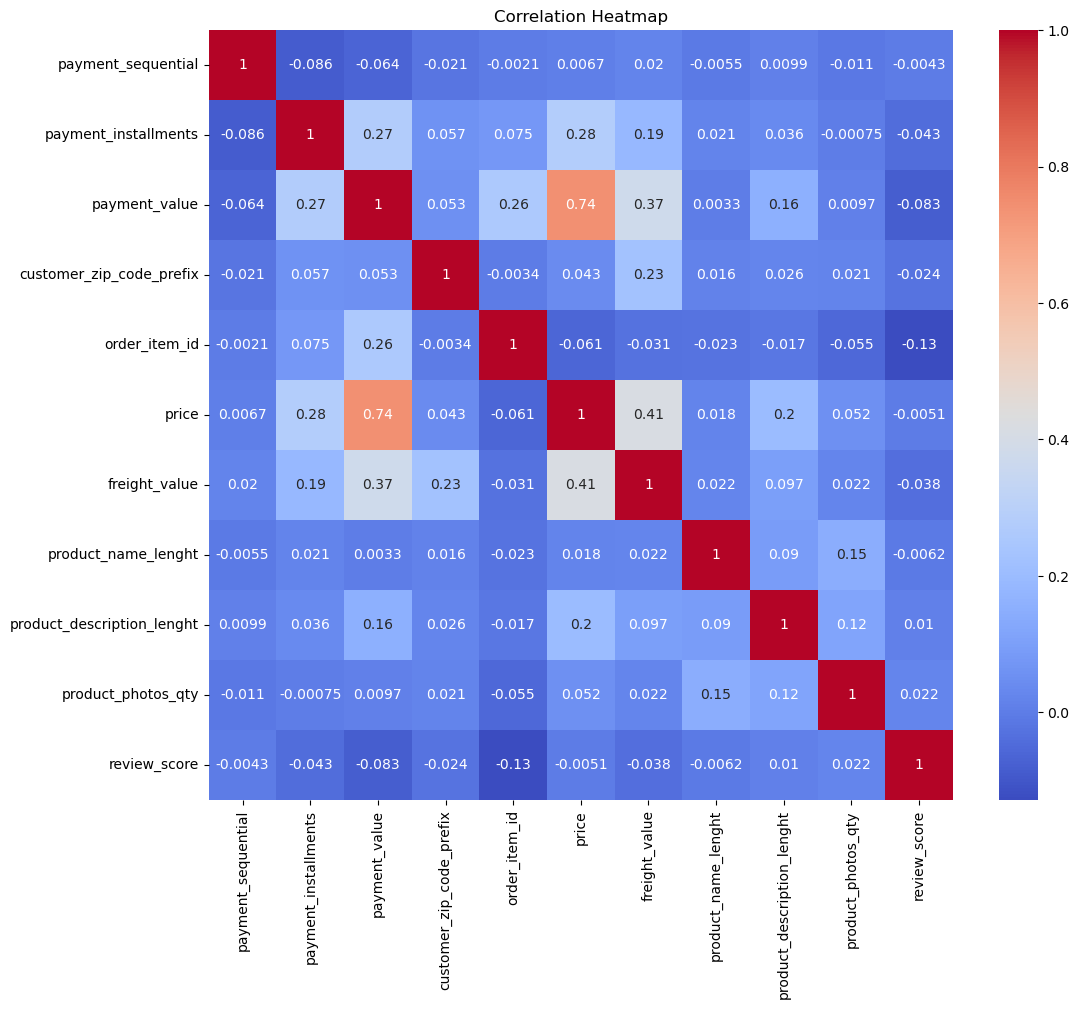

In [17]:
# Plot 8: Correlation Heatmap
plt.figure(figsize=(12, 10))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

**1.Payment-related Variables:**

* Payment installments and payment value have a moderate positive correlation of 0.27, indicating that higher payment values are associated with more installment payments.

* There is a weak negative correlation between payment sequential and payment value (-0.06), suggesting that the order in which payments are made may slightly decrease with higher payment values.

**2.Order-related Variables:**

* There are no significant correlations between customer zip code prefix and other variables, indicating that customer location does not strongly correlate with other features in the dataset.

* The price of a product has a moderate positive correlation with payment value (0.74) and a weaker positive correlation with payment installments (0.28).


**3.Review Score:**

* Review score does not show significant correlations with other variables in the dataset, implying that customer satisfaction (as indicated by review score) is not strongly related to other measured factors.

In [18]:
df.to_csv("../frontend/assets/csv/processed_olist_customers_dataset.csv",index=False)

In [1]:
df["payment_value"]

NameError: name 'df' is not defined